In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ple
import seaborn as sns

In [71]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [72]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

### 학력, 교육, 연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
* age: 나이
* workclass: 고용형태
* education: 학력
* education-num: 교육 기간
* marital-status: 혼인상태
* occupation: 직업
* relationship: 가족관계
* race: 인종
* sex: 성별
* capital-gain: 자산증가
* capital-loss: 자산감소
* hours-per-week: 주당 노동 시간
* native-country: 본국
* class: 연봉 - target(종속변수)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [74]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [75]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [76]:
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [77]:
data[data['workclass'].isna() == True] 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [78]:
data[(data['workclass'].isna() == True) & (data['class'] == ' >50K')] 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
89,41,NaN,Masters,14,Married-civ-spouse,NaN,Wife,White,Female,7688,0,10,United-States,>50K
182,28,NaN,HS-grad,9,Married-civ-spouse,NaN,Own-child,White,Female,0,0,38,United-States,>50K
274,53,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,>50K
505,38,NaN,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,1887,10,United-States,>50K
781,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,5178,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48278,60,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,12,United-States,>50K
48279,52,NaN,12th,8,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,>50K
48297,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,>50K
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K


In [79]:
data[(data['workclass'].isna() == True) & (data['class'] == ' <=50K')] 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48775,82,NaN,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,3,United-States,<=50K
48806,81,NaN,Assoc-voc,11,Divorced,NaN,Unmarried,White,Female,0,0,1,NaN,<=50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [80]:
data[(data['occupation'].isna() == True) & (data['class'] == ' >50K')] 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
89,41,NaN,Masters,14,Married-civ-spouse,NaN,Wife,White,Female,7688,0,10,United-States,>50K
182,28,NaN,HS-grad,9,Married-civ-spouse,NaN,Own-child,White,Female,0,0,38,United-States,>50K
274,53,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,>50K
505,38,NaN,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,1887,10,United-States,>50K
781,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,5178,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48278,60,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,12,United-States,>50K
48279,52,NaN,12th,8,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,>50K
48297,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,>50K
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K


In [81]:
data['class'].value_counts()

class
 <=50K    37155
 >50K     11687
Name: count, dtype: int64

In [82]:
data2 = data.copy()

In [83]:
data = data.dropna()

In [84]:
data['class'].value_counts()

class
 <=50K    34014
 >50K     11208
Name: count, dtype: int64

In [85]:
11208/34014*100

32.95113776680191

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  class           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


# Age

In [87]:
def age_dist(age):
    if 10 <= age < 20:
        return '10s'
    elif 20 <= age < 30:
        return '20s'
    elif 30 <= age < 40:
        return '30s'
    elif 40 <= age < 50:
        return '40s'
    elif 50 <= age < 60:
        return '50s'
    elif 60 <= age < 70:
        return '60s'
    elif 70 <= age < 80:
        return '70s'
    elif 80 <= age < 90:
        return '80s'
    elif 90 <= age < 100:
        return '90s'

In [88]:
data['age'] = data['age'].apply(age_dist)

In [89]:
data.head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [90]:
data['age'].value_counts(sort=False)

age
20s    10993
30s    12362
40s    10305
60s     2514
50s     6264
10s     2052
70s      589
80s       97
90s       46
Name: count, dtype: int64

In [91]:
data.loc[data['age'] == '90s']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
899,90s,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,1825,50,United-States,>50K
3496,90s,Self-emp-not-inc,Prof-school,15,Widowed,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
6976,90s,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,2414,0,40,United-States,<=50K
7414,90s,Private,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,6097,0,45,United-States,>50K
7419,90s,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,45,United-States,>50K
8427,90s,Federal-gov,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
8982,90s,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,South,<=50K
10735,90s,Local-gov,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,11678,0,40,United-States,>50K
12446,90s,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,1944,12,United-States,<=50K
13958,90s,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,10,United-States,<=50K


In [92]:
data.groupby('age')['class'].value_counts(sort=False)

age  class 
10s   <=50K     2050
      >50K         2
20s   <=50K    10274
      >50K       719
30s   <=50K     8996
      >50K      3366
40s   <=50K     6425
      >50K      3880
50s   <=50K     3855
      >50K      2409
60s   <=50K     1828
      >50K       686
70s   <=50K      469
      >50K       120
80s   <=50K       83
      >50K        14
90s   <=50K       34
      >50K        12
Name: count, dtype: int64

<Axes: xlabel='age'>

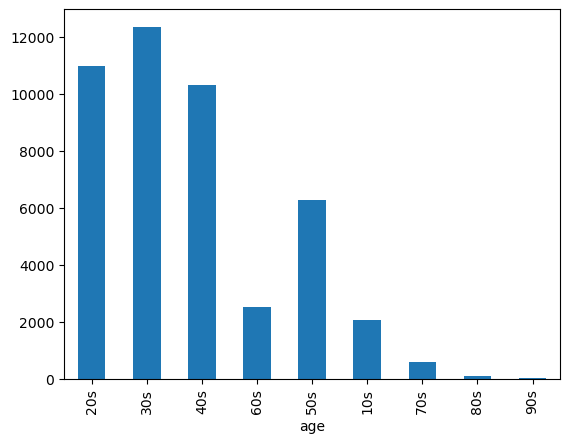

In [93]:
data['age'].value_counts(sort=False).plot(kind='bar')

## workclass

In [94]:
data['workclass'].value_counts()

workclass
 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: count, dtype: int64

In [95]:
data = data.apply(lambda x: x.str.strip().replace(" ","") if x.dtype == 'O' else x)

In [96]:
workclass_clsss = data.groupby('workclass')['class'].value_counts(sort=False)

In [97]:
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [69]:
def c_ratio(x):
    for idx, item in zip(x.index, x):
        if idx[1] == '<=50K':
            under_50 = item
        else:
            upper_50 = item
            class_ratio = upper_50/(upper_50+under_50) * 100
            print(idx, f'{class_ratio:.2f}%')


In [66]:
c_ratio(workclass_clsss)

('Federal-gov', '>50K') 39.05%
('Local-gov', '>50K') 29.52%
('Private', '>50K') 21.77%
('Self-emp-inc', '>50K') 55.41%
('Self-emp-not-inc', '>50K') 27.90%
('State-gov', '>50K') 26.72%
('Without-pay', '>50K') 9.52%


* 중앙정부에서 일할 경우 5만불 이상일 가능성이 높고, 자영업자의 경우 55%에 달함

### education

In [67]:
data['education'].value_counts()

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

In [68]:
education_class = data.groupby('education')['class'].value_counts(sort=False)
c_ratio(education_class)

('10th', '>50K') 6.70%
('11th', '>50K') 5.50%
('12th', '>50K') 7.45%
('1st-4th', '>50K') 3.60%
('5th-6th', '>50K') 4.90%
('7th-8th', '>50K') 6.68%
('9th', '>50K') 5.62%
('Assoc-acdm', '>50K') 26.41%
('Assoc-voc', '>50K') 25.73%
('Bachelors', '>50K') 41.98%
('Doctorate', '>50K') 73.35%
('HS-grad', '>50K') 16.34%
('Masters', '>50K') 55.41%
('Preschool', '>50K') 1.39%
('Prof-school', '>50K') 75.41%
('Some-college', '>50K') 20.10%


* 학력이 높을 수록 연봉 5만 이상자가 많다.

In [98]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

## education-num

In [100]:
data['education-num'].value_counts()

education-num
9     14783
10     9899
13     7570
14     2514
11     1959
7      1619
12     1507
6      1223
4       823
15      785
5       676
8       577
16      544
3       449
2       222
1        72
Name: count, dtype: int64

In [102]:
edu_num = data.groupby('education-num')['class'].value_counts(sort=False)
c_ratio(edu_num)

(1, '>50K') 1.39%
(2, '>50K') 3.60%
(3, '>50K') 4.90%
(4, '>50K') 6.68%
(5, '>50K') 5.62%
(6, '>50K') 6.70%
(7, '>50K') 5.50%
(8, '>50K') 7.45%
(9, '>50K') 16.34%
(10, '>50K') 20.10%
(11, '>50K') 25.73%
(12, '>50K') 26.41%
(13, '>50K') 41.98%
(14, '>50K') 55.41%
(15, '>50K') 75.41%
(16, '>50K') 73.35%


* 교육기간이 길수록 연봉이 높다

## marital-status

In [104]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [105]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64

In [107]:
mari_stat = data.groupby('marital-status')['class'].value_counts(sort=False)
c_ratio(mari_stat)

('Divorced', '>50K') 10.40%
('Married-AF-spouse', '>50K') 43.75%
('Married-civ-spouse', '>50K') 45.42%
('Married-spouse-absent', '>50K') 9.78%
('Never-married', '>50K') 4.80%
('Separated', '>50K') 7.02%
('Widowed', '>50K') 9.48%


* 결혼을 했을 경우 소득이 높다

## occupation

In [108]:
data['occupation'].value_counts()

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: count, dtype: int64

In [109]:
occu = data.groupby('occupation')['class'].value_counts(sort=False)
c_ratio(occu)

('Adm-clerical', '>50K') 13.65%
('Armed-Forces', '>50K') 28.57%
('Craft-repair', '>50K') 22.51%
('Exec-managerial', '>50K') 47.91%
('Farming-fishing', '>50K') 11.62%
('Handlers-cleaners', '>50K') 6.60%
('Machine-op-inspct', '>50K') 12.29%
('Other-service', '>50K') 4.08%
('Priv-house-serv', '>50K') 1.29%
('Prof-specialty', '>50K') 45.01%
('Protective-serv', '>50K') 31.45%
('Sales', '>50K') 26.90%
('Tech-support', '>50K') 28.94%
('Transport-moving', '>50K') 20.64%


* Exec-managerial, Prof-specialty 인경우 소득이 높음

## relationship

In [111]:
data['relationship'].value_counts()

relationship
Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: count, dtype: int64

In [112]:
relation = data.groupby('relationship')['class'].value_counts(sort=False)
c_ratio(relation)

('Husband', '>50K') 45.57%
('Not-in-family', '>50K') 10.49%
('Other-relative', '>50K') 3.71%
('Own-child', '>50K') 1.58%
('Unmarried', '>50K') 6.31%
('Wife', '>50K') 48.59%


* 남편과 아내인 경우 소득이 높다

In [113]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

## race

In [114]:
data['race'].value_counts()

race
White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: count, dtype: int64

In [115]:
race = data.groupby('race')['class'].value_counts(sort=False)
c_ratio(race)

('Amer-Indian-Eskimo', '>50K') 12.18%
('Asian-Pac-Islander', '>50K') 28.32%
('Black', '>50K') 12.63%
('Other', '>50K') 12.75%
('White', '>50K') 26.24%


* 아시아인이거나 백인인 경우 소득이 높은 편

## sex

In [116]:
data['sex'].value_counts()

sex
Male      30527
Female    14695
Name: count, dtype: int64

In [117]:
sex = data.groupby('sex')['class'].value_counts(sort=False)
c_ratio(sex)

('Female', '>50K') 11.36%
('Male', '>50K') 31.25%


In [118]:
data['capital-gain'].describe()

count    45222.000000
mean      1101.430344
std       7506.430084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

<Axes: ylabel='Frequency'>

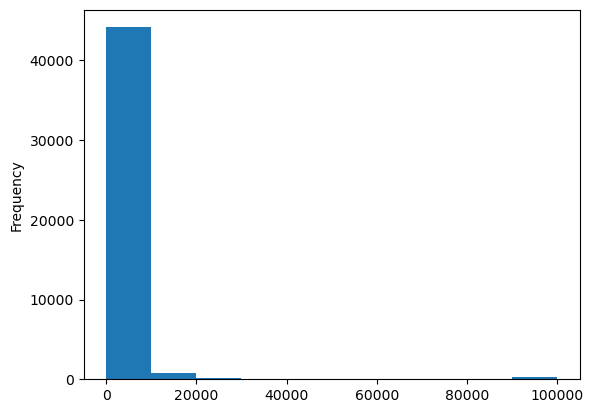

In [119]:
data['capital-gain'].plot(kind='hist')

<Axes: >

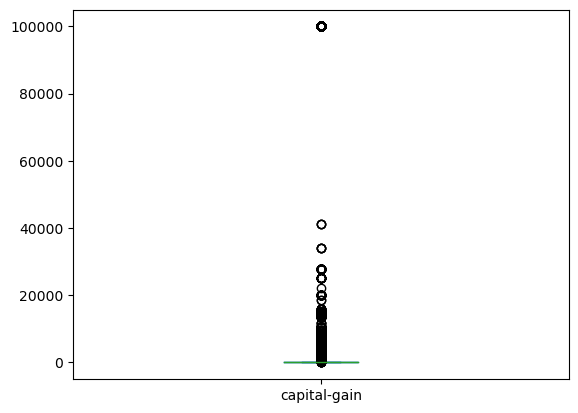

In [120]:
data['capital-gain'].plot(kind='box')

In [122]:
data['capital-gain'] = data['capital-gain'].apply(lambda x: 1 if x > 0 else 0)

In [124]:
data['capital-loss'] = data['capital-loss'].apply(lambda x: 1 if x > 0 else 0)

In [125]:
data.head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [126]:
data['capital-gain'].value_counts()

capital-gain
0    41432
1     3790
Name: count, dtype: int64

In [127]:
data['capital-loss'].value_counts()

capital-loss
0    43082
1     2140
Name: count, dtype: int64

In [129]:
cgain = data.groupby('capital-gain')['class'].value_counts(sort=False)
c_ratio(cgain)

(0, '>50K') 21.32%
(1, '>50K') 62.66%


In [130]:
closs = data.groupby('capital-loss')['class'].value_counts(sort=False)
c_ratio(closs)

(0, '>50K') 23.47%
(1, '>50K') 51.31%


## hours-per-week

In [131]:
data['hours-per-week'].value_counts()

hours-per-week
40    21358
50     4094
45     2602
60     2085
35     1776
      ...  
79        1
69        1
87        1
94        1
82        1
Name: count, Length: 96, dtype: int64

<Axes: ylabel='Frequency'>

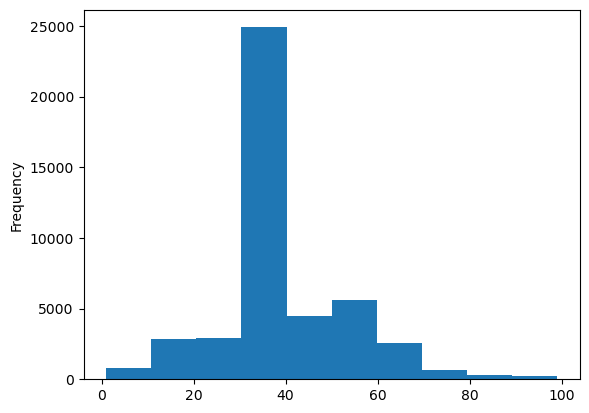

In [134]:
data['hours-per-week'].plot(kind='hist')

In [136]:
data['hours-per-week'].describe()

count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [138]:
# 정상 범위
nor_max = 45 + ((45-40) *1.5)
nor_min = 40 - ((45-40) *1.5)
print(nor_max)
print(nor_min)

52.5
32.5


In [139]:
def work_hour(x):
    if x > 52.5:
        return 'work_more'
    elif x < 32.5:
        return 'work_less'
    else:
        return 'work_normal'

In [141]:
data['hours-per-week'] = data['hours-per-week'].apply(work_hour)

In [142]:
hpw = data.groupby('hours-per-week')['class'].value_counts(sort=False)
c_ratio(hpw)

('work_less', '>50K') 6.82%
('work_more', '>50K') 41.80%
('work_normal', '>50K') 25.97%


* 일을 많이 하는 사람이 연봉이 높을 가능성이 높다.

## native-country

In [143]:
data['native-country'].value_counts()

native-country
United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In [146]:
n_country = data.groupby('native-country')['class'].value_counts(sort=False)
c_ratio(n_country)

('Cambodia', '>50K') 34.62%
('Canada', '>50K') 36.81%
('China', '>50K') 31.86%
('Columbia', '>50K') 4.88%
('Cuba', '>50K') 25.56%
('Dominican-Republic', '>50K') 5.15%
('Ecuador', '>50K') 13.95%
('El-Salvador', '>50K') 7.48%
('England', '>50K') 39.50%
('France', '>50K') 44.44%
('Germany', '>50K') 30.05%
('Greece', '>50K') 36.73%
('Guatemala', '>50K') 3.49%
('Haiti', '>50K') 13.04%
('Honduras', '>50K') 10.53%
('Hong', '>50K') 28.57%
('Hungary', '>50K') 33.33%
('India', '>50K') 42.18%
('Iran', '>50K') 39.29%
('Ireland', '>50K') 27.78%
('Italy', '>50K') 33.00%
('Jamaica', '>50K') 13.59%
('Japan', '>50K') 34.83%
('Laos', '>50K') 9.52%
('Mexico', '>50K') 5.20%
('Nicaragua', '>50K') 6.25%
('Outlying-US(Guam-USVI-etc)', '>50K') 4.55%
('Peru', '>50K') 8.89%
('Philippines', '>50K') 29.68%
('Poland', '>50K') 19.75%
('Portugal', '>50K') 19.35%
('Puerto-Rico', '>50K') 11.43%
('Scotland', '>50K') 10.00%
('South', '>50K') 17.82%
('Taiwan', '>50K') 45.45%
('Thailand', '>50K') 17.24%
('Trinadad&Tobago'

In [147]:
data.head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,work_normal,United-States,<=50K
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,work_normal,United-States,<=50K


In [149]:
data = data.drop(["education", "capital-gain", "capital-loss"], axis=1)

# 더미변수화

In [150]:
data.head(2)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,20s,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,work_normal,United-States,<=50K
1,30s,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,work_normal,United-States,<=50K


In [152]:
data = pd.get_dummies(data, drop_first=True)

In [153]:
data.head()

,education-num,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_80s,age_90s,workclass_Local-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_>50K
0,7,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,9,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,12,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,10,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
5,6,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [155]:
X = data.drop("class_>50K", axis=1)
y = data['class_>50K']

In [158]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 86 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   education-num                              45222 non-null  int64
 1   age_20s                                    45222 non-null  bool 
 2   age_30s                                    45222 non-null  bool 
 3   age_40s                                    45222 non-null  bool 
 4   age_50s                                    45222 non-null  bool 
 5   age_60s                                    45222 non-null  bool 
 6   age_70s                                    45222 non-null  bool 
 7   age_80s                                    45222 non-null  bool 
 8   age_90s                                    45222 non-null  bool 
 9   workclass_Local-gov                        45222 non-null  bool 
 10  workclass_Private                          45222 no

In [156]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state = 10)

# 앙상블 분석
### 예측력을 높이기 위해서 여러 번의 데이터 분할을 통해 구축된 다수의 모형을 결합해서 새로운 모형을 만드는 방법
#### 앙상블(Ensemble) 분석의 종류
* 배깅(Bsgging)
* 부스팅(Boosting)
  * ADABoost(에이다 부스트)
  * XGBoost(XG 부스트)
  * Gradient Boost(그래디언트 부스트)
  * LightGBM (라이트 GBM)
* 랜덤배깅(Random Bagging)
  * Random Forest(랜덤 포레스트)

### 배깅(Bsgging)
* 여러 개의 부트스트랩을 생성해서 각각을 분류기에 넣고 분석한 결과는 집계하는 알고리즘
* 여러 개의 분류기에 의한 결과를 놓고 다수결에 의하여 최종 결과값을 선정하는 보팅(voting)으로 결정

In [162]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [164]:
bcf = BaggingClassifier(n_estimators=1000, n_jobs=-1, random_state = 10)
bcf.fit(X_train, y_train)
pred_bcf = bcf.predict(X_test)
print(accuracy_score(y_test, pred_bcf))
print(classification_report(y_test, pred_bcf))

0.8135549495098401
              precision    recall  f1-score   support

       False       0.86      0.90      0.88     20411
        True       0.64      0.56      0.60      6723

    accuracy                           0.81     27134
   macro avg       0.75      0.73      0.74     27134
weighted avg       0.81      0.81      0.81     27134



## 부스팅

### 1. 에이다 부스팅 ADABoosting
* 오류에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
* 요류를 최소화 하는 방향성을 가지고 반복적으로 가중치를 업데이트 해서 성능 향상
* DecisionTreeClassifier(max_depth=1)을 사용하는 아주 약한 학습기
* 순차적으로 학습해야 하므로 멀티코어 사용불가, 분석시간 오래걸림
* 하이퍼파라미터
  * n_estimators: int, default=50
  * learning_rate: float, default=1.0
  * algorithm: {'SAMME', 'SAMMER.R'}, default='SAMMER.R'

In [167]:
from sklearn.ensemble import AdaBoostClassifier

In [168]:
ada = AdaBoostClassifier(n_estimators = 1000, random_state=10)
ada.fit(X_train, y_train)
pred_ada = ada.predict(X_test)
print(accuracy_score(y_test, pred_ada))
print(classification_report(y_test, pred_ada))

0.8335667428318715
              precision    recall  f1-score   support

       False       0.87      0.92      0.89     20411
        True       0.70      0.58      0.63      6723

    accuracy                           0.83     27134
   macro avg       0.78      0.75      0.76     27134
weighted avg       0.83      0.83      0.83     27134



### 2. 그래디언트부스팅 GradientTreeBoosting
* 이전 트리의 오차를 보완하는 방식으로 순차적 트리 생성
* 무작위성은 없지만 강력한 사전 가지치지가 사용 됨
* 오류에 가중치를 부여하면서 부스팅을 수행하는 점에서는 동일하나 가중치 업데이트를 경사하강법을 이요해 한다는 점이 다름
* 약한 학습기의 순차적인 예측 오류 보정을 통해서 학습을 수행하므로 멀티코어 병렬처리가 안됨 => 분석 시간이 오래 걸림
* 하이퍼파라미터
  * loss: 경사 하강법에 사용할 비용 함수
  * learning_rate: 학습율 0~1 사이의 값 작은 값일 수록 예측성능이 좋아질 수 있으나 시간이 오래 걸리고 너무 작으면 지역해에 빠질 수 있다.
  * n_estimators: 기본 100, 약학습기의 숫자가 많을 수록 예측 성능 향상되나 과적합 우려가 있음.
  * learning_rate를 작게하고 n_estimators를 크게하면 한계점까지 예측 성능이 좋아질 수 있음
  * max_depth: defalut= 3 트리의 복잡도가 낮아지도록 5를 넘지 않게 세팅

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1000, random_state=10)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
print(accuracy_score(y_test, pred_gbc))
print(classification_report(y_test, pred_gbc))

0.8352620328738851
              precision    recall  f1-score   support

       False       0.87      0.91      0.89     20411
        True       0.69      0.60      0.64      6723

    accuracy                           0.84     27134
   macro avg       0.78      0.76      0.77     27134
weighted avg       0.83      0.84      0.83     27134



In [171]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=10000, random_state=10)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
print(accuracy_score(y_test, pred_gbc))
print(classification_report(y_test, pred_gbc))

0.8360359696321957
              precision    recall  f1-score   support

       False       0.87      0.92      0.89     20411
        True       0.70      0.59      0.64      6723

    accuracy                           0.84     27134
   macro avg       0.79      0.75      0.77     27134
weighted avg       0.83      0.84      0.83     27134



### 히스토그램 그래디언트 부스팅(HistGradientBoostingClassifier)
* 데이터가 10만개 이상일 경우 사용
* 그래디언트 부스팅 보다 속도가 빠름

In [173]:
from sklearn.ensemble import HistGradientBoostingClassifier
hbc = HistGradientBoostingClassifier(random_state=10)
hbc.fit(X_train, y_train)
pred_hbc = hbc.predict(X_test)
print(accuracy_score(y_test, pred_hbc))
print(classification_report(y_test, pred_hbc))

0.8360359696321957
              precision    recall  f1-score   support

       False       0.87      0.92      0.89     20411
        True       0.70      0.59      0.64      6723

    accuracy                           0.84     27134
   macro avg       0.79      0.75      0.77     27134
weighted avg       0.83      0.84      0.83     27134



### XGBoost 현재 가장 우수한 알고리즘 중 하나
* 그래디언트 부스팅의 느린 속도 및 과적합 문제를 해결
* 멀티 코어 분석 지원
* 자체 과적합 규제 기능
* 더 이상 긍정적인 영향이 없는 가지에 대한 가지치기 기능
* 교차검증 기능 자체 내장, 조기 중단 가능
* 결측값 자체 처리
* 주요 하이퍼파라미터
  * learning_rate: 작게
  * n_estimators: 크게
* early stopping관련 옵션
  * early_stopping_rounds=100
  * eval_metric='logloss'
  * eval_set=[(X_test, y_test)]
  * verbose = True

In [177]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators= 1000, n_jobs=-1, learning_rate=0.01, random_state=10)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))

0.8369573229158989
              precision    recall  f1-score   support

       False       0.87      0.92      0.89     20411
        True       0.71      0.59      0.64      6723

    accuracy                           0.84     27134
   macro avg       0.79      0.75      0.77     27134
weighted avg       0.83      0.84      0.83     27134



In [180]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators= 10000, n_jobs=-1, learning_rate=0.01, random_state=10)
xgb.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='logloss', eval_set=[(X_test, y_test)])
pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.55750
[1]	validation_0-logloss:0.55422
[2]	validation_0-logloss:0.55102
[3]	validation_0-logloss:0.54789
[4]	validation_0-logloss:0.54483
[5]	validation_0-logloss:0.54184
[6]	validation_0-logloss:0.53893
[7]	validation_0-logloss:0.53607
[8]	validation_0-logloss:0.53327
[9]	validation_0-logloss:0.53053
[10]	validation_0-logloss:0.52784
[11]	validation_0-logloss:0.52522
[12]	validation_0-logloss:0.52264
[13]	validation_0-logloss:0.52012
[14]	validation_0-logloss:0.51765
[15]	validation_0-logloss:0.51523
[16]	validation_0-logloss:0.51285
[17]	validation_0-logloss:0.51053
[18]	validation_0-logloss:0.50825
[19]	validation_0-logloss:0.50602
[20]	validation_0-logloss:0.50382
[21]	validation_0-logloss:0.50168
[22]	validation_0-logloss:0.49957
[23]	validation_0-logloss:0.49749
[24]	validation_0-logloss:0.49545
[25]	validation_0-logloss:0.49347
[26]	validation_0-logloss:0.49150
[27]	validation_0-logloss:0.48958
[28]	validation_0-logloss:0.48769
[29]	validation_0-loglos

[238]	validation_0-logloss:0.36873
[239]	validation_0-logloss:0.36861
[240]	validation_0-logloss:0.36851
[241]	validation_0-logloss:0.36840
[242]	validation_0-logloss:0.36828
[243]	validation_0-logloss:0.36817
[244]	validation_0-logloss:0.36806
[245]	validation_0-logloss:0.36795
[246]	validation_0-logloss:0.36784
[247]	validation_0-logloss:0.36775
[248]	validation_0-logloss:0.36764
[249]	validation_0-logloss:0.36755
[250]	validation_0-logloss:0.36746
[251]	validation_0-logloss:0.36735
[252]	validation_0-logloss:0.36726
[253]	validation_0-logloss:0.36716
[254]	validation_0-logloss:0.36708
[255]	validation_0-logloss:0.36696
[256]	validation_0-logloss:0.36688
[257]	validation_0-logloss:0.36678
[258]	validation_0-logloss:0.36671
[259]	validation_0-logloss:0.36664
[260]	validation_0-logloss:0.36656
[261]	validation_0-logloss:0.36649
[262]	validation_0-logloss:0.36641
[263]	validation_0-logloss:0.36633
[264]	validation_0-logloss:0.36627
[265]	validation_0-logloss:0.36620
[266]	validation_0-l

[473]	validation_0-logloss:0.35758
[474]	validation_0-logloss:0.35754
[475]	validation_0-logloss:0.35751
[476]	validation_0-logloss:0.35750
[477]	validation_0-logloss:0.35750
[478]	validation_0-logloss:0.35746
[479]	validation_0-logloss:0.35744
[480]	validation_0-logloss:0.35742
[481]	validation_0-logloss:0.35741
[482]	validation_0-logloss:0.35739
[483]	validation_0-logloss:0.35737
[484]	validation_0-logloss:0.35735
[485]	validation_0-logloss:0.35732
[486]	validation_0-logloss:0.35731
[487]	validation_0-logloss:0.35729
[488]	validation_0-logloss:0.35725
[489]	validation_0-logloss:0.35722
[490]	validation_0-logloss:0.35719
[491]	validation_0-logloss:0.35717
[492]	validation_0-logloss:0.35716
[493]	validation_0-logloss:0.35712
[494]	validation_0-logloss:0.35708
[495]	validation_0-logloss:0.35707
[496]	validation_0-logloss:0.35705
[497]	validation_0-logloss:0.35704
[498]	validation_0-logloss:0.35702
[499]	validation_0-logloss:0.35702
[500]	validation_0-logloss:0.35701
[501]	validation_0-l

[707]	validation_0-logloss:0.35477
[708]	validation_0-logloss:0.35477
[709]	validation_0-logloss:0.35476
[710]	validation_0-logloss:0.35475
[711]	validation_0-logloss:0.35475
[712]	validation_0-logloss:0.35475
[713]	validation_0-logloss:0.35475
[714]	validation_0-logloss:0.35474
[715]	validation_0-logloss:0.35473
[716]	validation_0-logloss:0.35472
[717]	validation_0-logloss:0.35472
[718]	validation_0-logloss:0.35472
[719]	validation_0-logloss:0.35472
[720]	validation_0-logloss:0.35471
[721]	validation_0-logloss:0.35470
[722]	validation_0-logloss:0.35469
[723]	validation_0-logloss:0.35469
[724]	validation_0-logloss:0.35469
[725]	validation_0-logloss:0.35468
[726]	validation_0-logloss:0.35467
[727]	validation_0-logloss:0.35467
[728]	validation_0-logloss:0.35467
[729]	validation_0-logloss:0.35466
[730]	validation_0-logloss:0.35465
[731]	validation_0-logloss:0.35465
[732]	validation_0-logloss:0.35464
[733]	validation_0-logloss:0.35464
[734]	validation_0-logloss:0.35463
[735]	validation_0-l

[942]	validation_0-logloss:0.35409
[943]	validation_0-logloss:0.35408
[944]	validation_0-logloss:0.35408
[945]	validation_0-logloss:0.35408
[946]	validation_0-logloss:0.35408
[947]	validation_0-logloss:0.35408
[948]	validation_0-logloss:0.35408
[949]	validation_0-logloss:0.35408
[950]	validation_0-logloss:0.35408
[951]	validation_0-logloss:0.35408
[952]	validation_0-logloss:0.35408
[953]	validation_0-logloss:0.35408
[954]	validation_0-logloss:0.35408
[955]	validation_0-logloss:0.35408
[956]	validation_0-logloss:0.35408
[957]	validation_0-logloss:0.35407
[958]	validation_0-logloss:0.35407
[959]	validation_0-logloss:0.35407
[960]	validation_0-logloss:0.35407
[961]	validation_0-logloss:0.35407
[962]	validation_0-logloss:0.35407
[963]	validation_0-logloss:0.35407
[964]	validation_0-logloss:0.35407
[965]	validation_0-logloss:0.35407
[966]	validation_0-logloss:0.35407
[967]	validation_0-logloss:0.35407
[968]	validation_0-logloss:0.35407
[969]	validation_0-logloss:0.35407
[970]	validation_0-l

### LightGBM
* XGBoost에 비해서 속도가 빠르고 메모리 사용량이 적음
* 10,000건 이하의 크기가 작은 데이터 세트에서 과적합 발생 위험이 있음
* 보통 트리기반 알고리즘은 균형 트리 분할을 사용해 트리간 균형을 맞추기 때문에 시간이 오래걸림
* 라이트GBM은 Leaf중심 트리 분할을 사용하여 트리의 균형을 맞추지 않고 최대 손실값을 가지는 리프노드를 지속적으로 분할하면서 깊고 비대칭적인 트리생성


In [183]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators= 1000, n_jobs=-1, learning_rate=0.01, random_state=10)
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_test)
print(accuracy_score(y_test, pred_lgbm))
print(classification_report(y_test, pred_lgbm))

[LightGBM] [Info] Number of positive: 4485, number of negative: 13603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 18088, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247954 -> initscore=-1.109552
[LightGBM] [Info] Start training from score -1.109552
0.837289010098032
              precision    recall  f1-score   support

       False       0.87      0.92      0.89     20411
        True       0.70      0.60      0.65      6723

    accuracy                           0.84     27134
   macro avg       0.79      0.76      0.77     27134
weighted avg       0.83      0.84      0.83     27134



### RandomForest

In [185]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 1000, n_jobs=-1, random_state=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

0.8198201518390211
              precision    recall  f1-score   support

       False       0.86      0.91      0.88     20411
        True       0.66      0.56      0.61      6723

    accuracy                           0.82     27134
   macro avg       0.76      0.73      0.74     27134
weighted avg       0.81      0.82      0.81     27134



### ExtraTreesClassifier
* 랜덤포레스트와 비슷하지만 후보 특성을 무작위로 분할 한 다음 최적의 분할 탐색
* 부트스트랩 샘플링은 사용하지 않음
* 무작위성 증가 => 모델의 편향은 늘어나지만 분산이 감소

In [186]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators= 1000, n_jobs=-1, random_state=10)
etc.fit(X_train, y_train)
pred_etc = etc.predict(X_test)
print(accuracy_score(y_test, pred_etc))
print(classification_report(y_test, pred_etc))

0.8121913466499595
              precision    recall  f1-score   support

       False       0.85      0.91      0.88     20411
        True       0.65      0.53      0.58      6723

    accuracy                           0.81     27134
   macro avg       0.75      0.72      0.73     27134
weighted avg       0.80      0.81      0.81     27134

